# Le modèle SIR en épidémiologie

**1. Représenter les données sur un graphe et les commenter.**

Nous allons tout d'abord télécharger le ficher Data_HK.csv. 

In [ ]:
##### On Colab: run this cell, then you will be asked to upload a file. 
##### You have to look for the Data_HK.csv file.

import pandas as pd
import seaborn as sns

from google.colab import files
uploaded = files.upload()

In [ ]:
import io
import pandas as pd
data = pd.read_csv(io.BytesIO(uploaded['Data_HK.csv']))

In [1]:
##### On Jupyter Notebook:
import pandas as pd
data = pd.read_csv('Data_HK.csv')

Ensuite nous pouvons faire un plot des données.

   Time (days)  Deaths
0            7      14
1           14      28
2           21      50
3           28      66
4           35     156


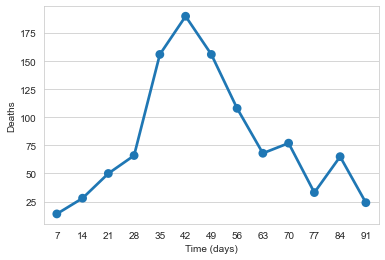

In [2]:
print(data.head())
import seaborn as sns
sns.set_style("whitegrid")

ax = sns.pointplot(x="Time (days)", y="Deaths", data=data)

**Graphique des courbes $s(t)$, $i(t)$ et $r(t)$ pour $\beta=0.5$ et $\gamma=0.33:$**

0.9999987341772152 1.2658227848101265e-06 0.0


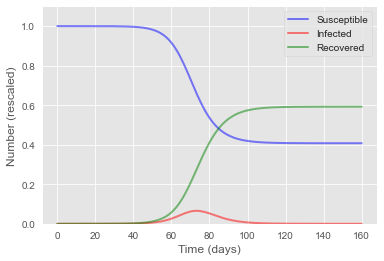

In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Total population, N.
N = 7900000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 10, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0

# Scaled variables
s0 = S0/N
i0 = I0/N
r0 = R0/N

print(s0,i0,r0)

# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.5, 0.33

# A grid of time points (in days)
t = np.linspace(0, 160, 160)

# The SIR model differential equations.
def deriv(y, t, beta, gamma):
    s, i, r = y
    dsdt = -beta * s * i
    didt = beta * s * i - gamma * i
    drdt = gamma * i
    return dsdt, didt, drdt

# Initial conditions vector
y0 = s0, i0, r0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(beta, gamma))
s, i, r = ret.T

# Plot the data on three separate curves for s(t), i(t) and r(t)
plt.figure()
plt.plot(t, s, 'b', alpha=0.5, lw=2, label='Susceptible')
plt.plot(t, i, 'r', alpha=0.5, lw=2, label='Infected')
plt.plot(t, r, 'g', alpha=0.5, lw=2, label='Recovered')
plt.xlabel('Time (days)')
plt.ylabel('Number (rescaled)')
plt.ylim(0,1.1)
plt.legend()
plt.show()


**13. Variation de $i(t)$ par rapport à $\beta$**

[0.5   0.875 1.25  1.625 2.   ]


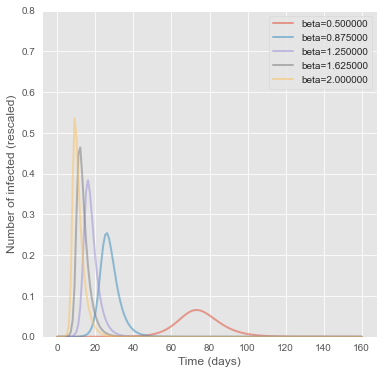

In [4]:
import numpy as np

Beta = np.linspace(0.5,2,5)
print(Beta)

fig = plt.figure(figsize=(6,6))
for betas in Beta:
  # Integrate the SIR equations over the time grid, t.
  ret = odeint(deriv, y0, t, args=(betas, gamma))
  s, i, r = ret.T

  # Plot i(t)
  plt.plot(t, i, alpha=0.5, lw=2, label='beta=%f' % betas)

plt.xlabel('Time (days)')
plt.ylabel('Number of infected (rescaled)')
plt.ylim(0,0.8)
plt.legend()   
plt.show()

**15. Variation de $i(t)$ par rapport à $\gamma$**

[0.1   0.225 0.35  0.475 0.6  ]


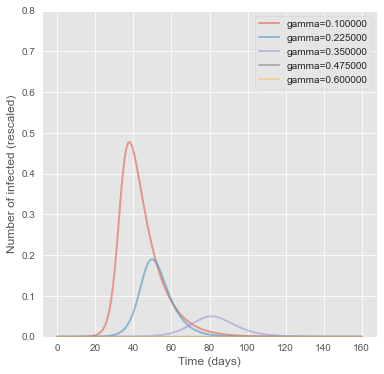

In [5]:
Gamma = np.linspace(0.1,0.6,5)
print(Gamma)

fig = plt.figure(figsize=(6,6))
for gammas in Gamma:
  # Integrate the SIR equations over the time grid, t.
  ret = odeint(deriv, y0, t, args=(beta, gammas))
  s, i, r = ret.T

  # Plot i(t)
  plt.plot(t, i, alpha=0.5, lw=2, label='gamma=%f' % gammas)

plt.xlabel('Time (days)')
plt.ylabel('Number of infected (rescaled)')
plt.ylim(0,0.8)
plt.legend()   
plt.show()

**17. Calibration par rapport aux données**

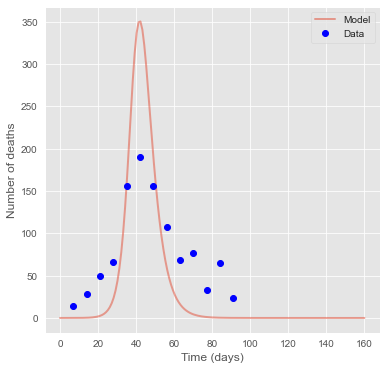

In [6]:
days = data["Time (days)"].to_list()
deaths = data["Deaths"].to_list()

beta, gamma = 0.65, 0.33
death_rate = 0.0003

fig = plt.figure(figsize=(6,6))

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(beta, gamma))
s, i, r = ret.T

# Plot I(t)*death_rate
for ii in range(len(i)):
  i[ii] = i[ii]*death_rate*N

plt.plot(t, i, alpha=0.5, lw=2, label='Model')
plt.plot(days, deaths, 'bo', label = 'Data')
plt.xlabel('Time (days)')
plt.ylabel('Number of deaths')
#plt.ylim(0,0.001)
plt.legend()   
plt.show()